In [2]:
# Najpierw importujemy pakiety niezbędne do analizy
import numpy as np  # Obliczenia numeryczne
import pandas as pd # Wczytywanie danych, obsługa DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler # Skalowanie danych 
from sklearn.model_selection import train_test_split # Podział danych na treningowe i testowe
# Macierz pomyłek, raport klasyfikacji, accuracy
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Uczenie maszynowe scikit-learn
from sklearn.tree import DecisionTreeClassifier # Drzewa decyzyjne
from sklearn.ensemble import RandomForestClassifier # Lasy losowe
import xgboost # XGBoost
from sklearn.neighbors import KNeighborsClassifier # kNN klasyfikator

In [3]:
# Jako dataset wybrano https://archive.ics.uci.edu/ml/datasets/Wine+Quality 

In [4]:
# Zbiór zawiera informacje dotyczące wina z regionu Vinho Verde. Dataset zawiera 12 kolumn oraz prawie 5000 rekordów. 
# Mamy 11 zmiennych opisujących oraz jedną zmienną opisywaną - quality (jakość wina). 
# Naszym zadaniem będzie dokonać predykcji jakości wina (zgodnie z opisem ze strony z datasetem 0-10) na podstawie 
# zmiannych opisująychc takich jak kwasowość, pH, gęstość, alkohol i inne wyżej wymienione.

In [5]:
# Ładujemy dane
df = pd.read_csv('winequality-white.csv', sep=';')

In [6]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [7]:
# Sprawdźmy brakujące dane 

In [8]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
# Nie mamy brakujących danych

In [10]:
# Zobaczmy typy kolumn

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [12]:
# Wszystkie kolumny to kolumny numeryczne

In [13]:
# Zobaczmy statystyczny opis analizownaej ramki danych
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [14]:
# Łatwo zauważyć, że kolumny różnią się między sobą - wartości średniej arytmetycznej oraz odchylenia standardowego

In [15]:
# Zobaczmy jak rozkładają się klasy w zmiennej opisywanej - quality
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [16]:
# Mamy bardzo mało danych z klas 3 oraz 9 - łącznie tylko 25 - musimy je usunąć. Danych dla klas 8 i 4 jest też bardzo mało. 
# Najwięcej mamy win z oceną 6. Zostawiamy więc klasy najbardziej liczne - 6,5,7

In [17]:
class_idx = df['quality'].value_counts().index[0:3]

In [18]:
class_idx

Int64Index([6, 5, 7], dtype='int64')

In [19]:
df_selected = df[df['quality'].isin(class_idx)]

In [20]:
df_selected

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [21]:
df_selected['quality'].value_counts()

6    2198
5    1457
7     880
Name: quality, dtype: int64

In [340]:
# Obejrzyjmy zawartość ramki danych na macierzy wykresów punktowych

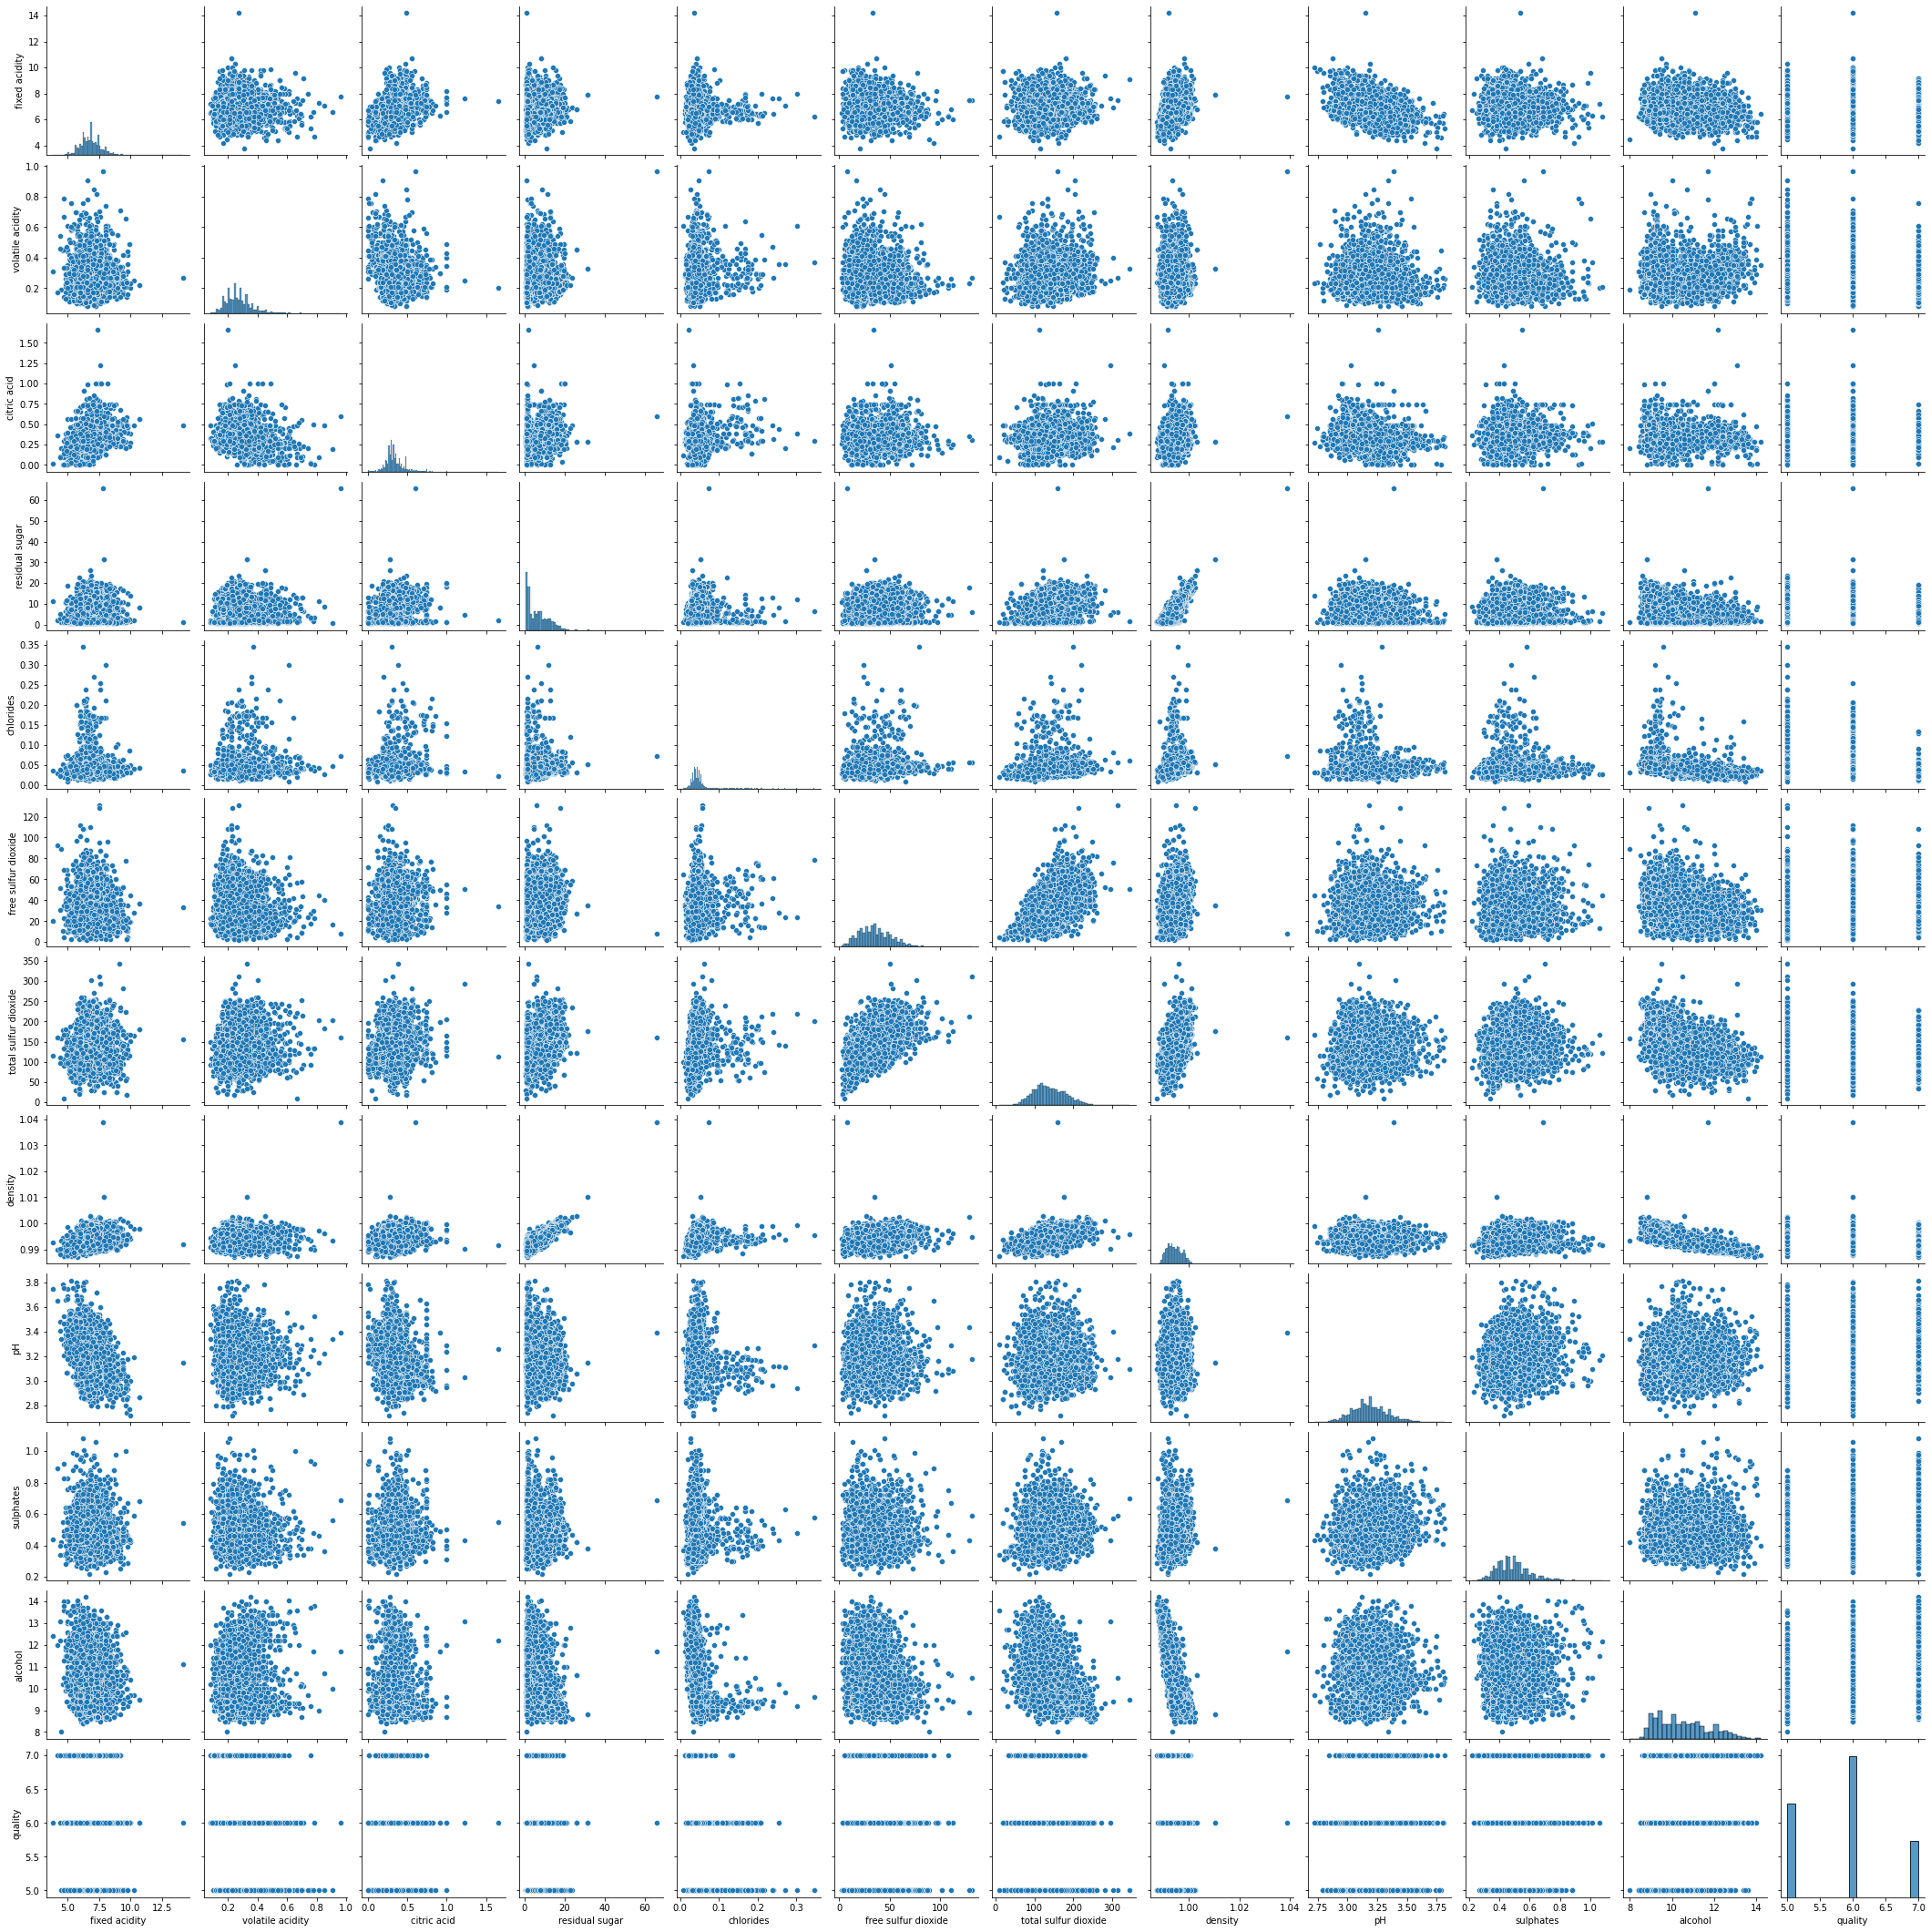

In [341]:
# Wyświetl macierz wykresów punktowych
sns.pairplot(df_selected, kind="scatter")
plt.show()

In [22]:
# Podzielmy nasze dane na treningowe oraz testowe

In [23]:
# Zmienne opisujące
X = df_selected.drop(columns=['quality'])
# Zmienna opisywana
Y = df_selected['quality']

In [24]:
# Podział danych na traningowe i testowe (80% treningowych, 20% testowych). Random state - dla powtarzalności wyników.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [25]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3820,6.3,0.300,0.20,3.70,0.039,34.0,132.0,0.99158,3.00,0.38,10.70
1126,6.5,0.115,0.29,1.95,0.038,73.0,166.0,0.98900,3.12,0.25,12.90
697,7.5,0.310,0.51,14.80,0.039,62.0,204.0,0.99820,3.06,0.60,9.50
1239,10.3,0.250,0.48,2.20,0.042,28.0,164.0,0.99800,3.19,0.59,9.70
1350,8.0,0.570,0.39,3.90,0.034,22.0,122.0,0.99170,3.29,0.67,12.80
...,...,...,...,...,...,...,...,...,...,...,...
1753,7.4,0.230,0.25,1.40,0.049,43.0,141.0,0.99340,3.42,0.54,10.20
4407,6.3,0.190,0.32,2.80,0.046,18.0,80.0,0.99043,2.92,0.47,11.05
1480,7.2,0.080,0.49,1.30,0.050,18.0,148.0,0.99450,3.46,0.44,10.20
3766,6.9,0.400,0.17,12.90,0.033,59.0,186.0,0.99754,3.08,0.49,9.40


In [26]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4264,5.8,0.20,0.16,1.40,0.042,44.0,99.0,0.98912,3.23,0.37,12.2
65,6.2,0.35,0.03,1.20,0.064,29.0,120.0,0.99340,3.22,0.54,9.1
2492,6.1,0.28,0.24,19.95,0.074,32.0,174.0,0.99922,3.19,0.44,9.3
3032,6.7,0.14,0.46,1.60,0.036,15.0,92.0,0.99264,3.37,0.49,10.9
2343,6.7,0.17,0.27,1.40,0.032,39.0,149.0,0.99254,3.40,0.52,10.5
...,...,...,...,...,...,...,...,...,...,...,...
3148,6.2,0.23,0.36,17.20,0.039,37.0,130.0,0.99946,3.23,0.43,8.8
3910,7.1,0.37,0.30,6.20,0.040,49.0,139.0,0.99021,3.17,0.27,13.6
2755,6.6,0.34,0.18,6.40,0.082,47.0,240.0,0.99710,3.42,0.48,9.2
1079,6.3,0.34,0.29,6.20,0.046,29.0,227.0,0.99520,3.29,0.53,10.1


In [30]:
# Mamy około 3.6 tysiąca danych treningowych oraz około tysiąca danych testowych

In [31]:
# Teraz zajmiemy się usuwaniem korelacji - analizę przeprowadzamy oczywiście w oparicu o dane treningowe. Dane testowe 
# uznajemy obecnie jako przychodzące (nieznane).

In [32]:
corr = X_train.corr()

<AxesSubplot:>

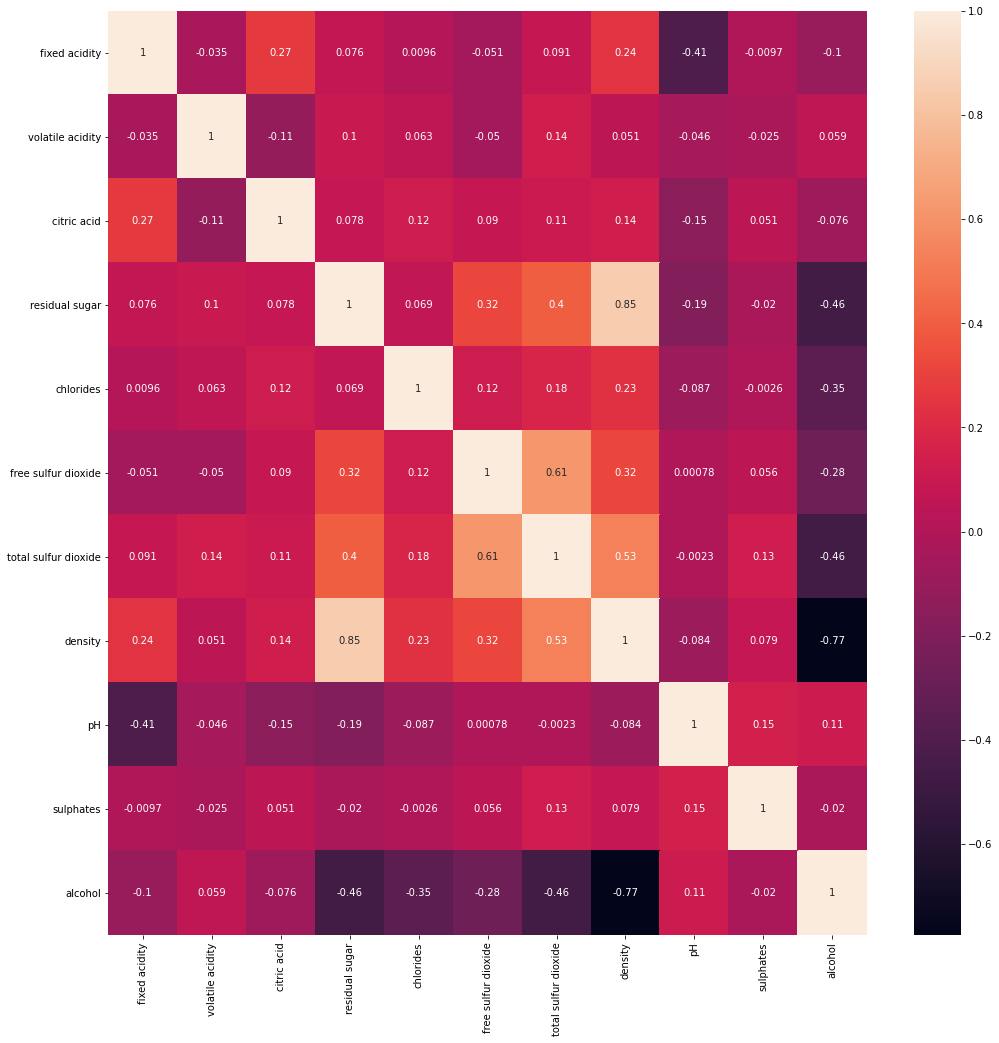

In [33]:
# Wyrysujmy macierz korelacji (Współczynniki Pearsona)
plt.figure(figsize = (17,17))
sns.heatmap(corr, annot=True)

In [34]:
# Jak łatwo zauwazyc mamy kilka silnie skorelowanych cech - na przykład gęstość ze słodkością (fizycznie ma sens)

In [35]:
# Musimy pozbyć się zbytnio skorelowanych cech

In [36]:
# Obliczmy moduł korelacji
corr_matrix = X_train.corr().abs()
# Ustalamy maksymalny próg skorelowania
thresh = 0.60
# Analizujemy jedynie macierz górnotrójkątną (powyżej diagonali) - macierz jest symetryczna i nie chcemy dwa razy
# usuwać tego samego
upper_triu_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
triu_cols = upper_triu_corr.columns
# Cechy powyzej ustawionego progu maksymalnej korelacji dodajemy do listy
high_correlated_features = [column for column in triu_cols if any(upper_triu_corr[column] > thresh)]

In [37]:
upper_triu_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,NaN,0.034847,0.268370,0.075585,0.009622,0.051074,0.090880,0.243173,0.411256,0.009733,0.100766
volatile acidity,NaN,NaN,0.110525,0.103334,0.063452,0.050009,0.139895,0.051192,0.045732,0.024645,0.058801
citric acid,NaN,NaN,NaN,0.078387,0.123754,0.089599,0.111810,0.139365,0.148773,0.050538,0.076361
residual sugar,NaN,NaN,NaN,NaN,0.068733,0.317090,0.403741,0.848228,0.191321,0.020018,0.462354
chlorides,NaN,NaN,NaN,NaN,NaN,0.121062,0.179032,0.232401,0.087323,0.002567,0.350830
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,0.613641,0.320497,0.000778,0.056375,0.280514
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.532246,0.002318,0.130851,0.458846
density,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.083628,0.078920,0.774707
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152753,0.113500
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020284


In [38]:
# Wypiszmy mocno skorelowane cechy
high_correlated_features

['total sulfur dioxide', 'density', 'alcohol']

In [355]:
# Usuńmy silnie skorelowane cechy z naszych danych
X_train_clear = X_train.drop(columns=high_correlated_features)
X_test_clear = X_test.drop(columns=high_correlated_features)

In [356]:
X_train_clear

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates
3820,6.3,0.300,0.20,3.70,0.039,34.0,3.00,0.38
1126,6.5,0.115,0.29,1.95,0.038,73.0,3.12,0.25
697,7.5,0.310,0.51,14.80,0.039,62.0,3.06,0.60
1239,10.3,0.250,0.48,2.20,0.042,28.0,3.19,0.59
1350,8.0,0.570,0.39,3.90,0.034,22.0,3.29,0.67
...,...,...,...,...,...,...,...,...
1753,7.4,0.230,0.25,1.40,0.049,43.0,3.42,0.54
4407,6.3,0.190,0.32,2.80,0.046,18.0,2.92,0.47
1480,7.2,0.080,0.49,1.30,0.050,18.0,3.46,0.44
3766,6.9,0.400,0.17,12.90,0.033,59.0,3.08,0.49


In [357]:
# Dane posiadają różne zakresy zmienności - musimy je znormalizować. Wykorzystujemy do tego skalowanie min - max

In [358]:
min_max = MinMaxScaler()
# http://rasbt.github.io/mlxtend/user_guide/preprocessing/minmax_scaling/

In [359]:
# Dopasowujemy do danych treningowych i przekształcamy. Następnie - przekształcamy dane testowe z hiperparametrami 
# uzyskanymi z danych treningowych

In [360]:
x_train_norm = min_max.fit_transform(X_train_clear)

In [361]:
x_test_norm = min_max.transform(X_test_clear)

In [362]:
# Teraz nasze dane zawierają się w zakresie 0 - 1
x_train_norm

array([[0.21      , 0.24858757, 0.12048193, ..., 0.24806202, 0.25454545,
        0.15662651],
       [0.23      , 0.03954802, 0.1746988 , ..., 0.5503876 , 0.36363636,
        0.        ],
       [0.33      , 0.25988701, 0.30722892, ..., 0.46511628, 0.30909091,
        0.42168675],
       ...,
       [0.3       , 0.        , 0.29518072, ..., 0.12403101, 0.67272727,
        0.22891566],
       [0.27      , 0.36158192, 0.10240964, ..., 0.44186047, 0.32727273,
        0.28915663],
       [0.43      , 0.16949153, 0.20481928, ..., 0.40310078, 0.31818182,
        0.36144578]])

In [363]:
# Budowa modeli

In [364]:
# 1. kNN

In [365]:
# W modelu knn musimy określić wartość k - liczba sąsiadów. Okreslimy ją poprzez testowanie konkrentych wartości.
# Częsta zasada to k=sqrt(n), gdzie n to liczba cech. W naszym przypadku byłoby to sqrt(8) ~ 3, czyli k = 3

In [366]:
# kNN classifier
k_max = 50
acc_list = []

for i in range(1, k_max+1):
    kNN_model = KNeighborsClassifier(n_neighbors=i)
    kNN_model.fit(x_train_norm, y_train)
    kNN_test_preds = kNN_model.predict(x_test_norm)
    acc_list.append(accuracy_score(y_test, kNN_test_preds))

Text(0, 0.5, 'accuracy')

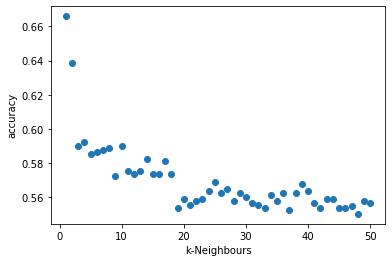

In [367]:
# Wyświetl accuracy
plt.scatter(list(range(1, k_max+1)), acc_list)
plt.xlabel('k-Neighbours')
plt.ylabel('accuracy')

In [368]:
# Okazuje się, ze najlepszym wyborem w tym przypadku jest zastosowanie k=1 sąsiada, czyli algorytmu NN.
acc_list.index(max(acc_list))+1 

1

In [369]:
k = 1
kNN_model = KNeighborsClassifier(n_neighbors=k)

In [370]:
kNN_model.fit(x_train_norm, y_train)

KNeighborsClassifier(n_neighbors=1)

In [371]:
# Sprawdzamy dla danych treningowych

In [372]:
kNN_train_preds = kNN_model.predict(x_train_norm)

In [373]:
confusion_matrix(y_train, kNN_train_preds)

array([[1136,    0,    0],
       [   0, 1755,    0],
       [   0,    0,  737]], dtype=int64)

In [374]:
print(classification_report(y_train, kNN_train_preds))

              precision    recall  f1-score   support

           5       1.00      1.00      1.00      1136
           6       1.00      1.00      1.00      1755
           7       1.00      1.00      1.00       737

    accuracy                           1.00      3628
   macro avg       1.00      1.00      1.00      3628
weighted avg       1.00      1.00      1.00      3628



In [375]:
# Model jest przetrenowany, jednak własnie taki model dał nam najlepsze accuracy dla danych testowych

In [376]:
# Dla danych testowych

In [377]:
kNN_test_preds = kNN_model.predict(x_test_norm)

In [378]:
confusion_matrix(y_test, kNN_test_preds)

array([[220,  82,  19],
       [ 87, 297,  59],
       [ 17,  39,  87]], dtype=int64)

In [379]:
print(classification_report(y_test, kNN_test_preds))

              precision    recall  f1-score   support

           5       0.68      0.69      0.68       321
           6       0.71      0.67      0.69       443
           7       0.53      0.61      0.56       143

    accuracy                           0.67       907
   macro avg       0.64      0.65      0.65       907
weighted avg       0.67      0.67      0.67       907



In [380]:
# 2. Drzewo decyzyjne

In [381]:
tree = DecisionTreeClassifier(max_depth=16)

In [382]:
tree.fit(x_train_norm, y_train)

DecisionTreeClassifier(max_depth=16)

In [383]:
tree_train_preds = tree.predict(x_train_norm)

In [384]:
confusion_matrix(y_train, tree_train_preds)

array([[1082,   52,    2],
       [  11, 1738,    6],
       [  12,   47,  678]], dtype=int64)

In [385]:
print(classification_report(y_train, tree_train_preds))

              precision    recall  f1-score   support

           5       0.98      0.95      0.97      1136
           6       0.95      0.99      0.97      1755
           7       0.99      0.92      0.95       737

    accuracy                           0.96      3628
   macro avg       0.97      0.95      0.96      3628
weighted avg       0.97      0.96      0.96      3628



In [386]:
# Dane testowe dla drzewa decyzyjnego

In [387]:
tree_test_preds = tree.predict(x_test_norm)

In [388]:
confusion_matrix(y_test, tree_test_preds)

array([[203, 101,  17],
       [ 85, 306,  52],
       [ 20,  45,  78]], dtype=int64)

In [389]:
print(classification_report(y_test, tree_test_preds))

              precision    recall  f1-score   support

           5       0.66      0.63      0.65       321
           6       0.68      0.69      0.68       443
           7       0.53      0.55      0.54       143

    accuracy                           0.65       907
   macro avg       0.62      0.62      0.62       907
weighted avg       0.65      0.65      0.65       907



In [390]:
# 3. Las losowy

In [391]:
rf_model = RandomForestClassifier(n_estimators=300, max_depth=14)

In [392]:
rf_model.fit(x_train_norm, y_train)

RandomForestClassifier(max_depth=14, n_estimators=300)

In [393]:
# Dla danych treningowych

In [394]:
rf_train_preds = rf_model.predict(x_train_norm)

In [395]:
confusion_matrix(y_train, rf_train_preds)

array([[1122,   13,    1],
       [   3, 1751,    1],
       [   0,   14,  723]], dtype=int64)

In [396]:
print(classification_report(y_train, rf_train_preds))

              precision    recall  f1-score   support

           5       1.00      0.99      0.99      1136
           6       0.98      1.00      0.99      1755
           7       1.00      0.98      0.99       737

    accuracy                           0.99      3628
   macro avg       0.99      0.99      0.99      3628
weighted avg       0.99      0.99      0.99      3628



In [397]:
# Dla danych testowych

In [398]:
rf_test_preds = rf_model.predict(x_test_norm)

In [399]:
confusion_matrix(y_test, rf_test_preds)

array([[218, 102,   1],
       [ 53, 370,  20],
       [  4,  64,  75]], dtype=int64)

In [400]:
print(classification_report(y_test, rf_test_preds))

              precision    recall  f1-score   support

           5       0.79      0.68      0.73       321
           6       0.69      0.84      0.76       443
           7       0.78      0.52      0.63       143

    accuracy                           0.73       907
   macro avg       0.75      0.68      0.71       907
weighted avg       0.74      0.73      0.73       907



In [401]:
# 4. Xgboost

In [402]:
xgbc = xgboost.XGBClassifier()

In [403]:
xgbc.fit(x_train_norm, y_train)

C:\Users\Marcin\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [404]:
# Dla danych treningowych

In [405]:
xgbc_train_preds = xgbc.predict(x_train_norm)

In [406]:
confusion_matrix(y_train, xgbc_train_preds)

array([[1106,   28,    2],
       [   9, 1743,    3],
       [   1,   31,  705]], dtype=int64)

In [407]:
print(classification_report(y_train, xgbc_train_preds))

              precision    recall  f1-score   support

           5       0.99      0.97      0.98      1136
           6       0.97      0.99      0.98      1755
           7       0.99      0.96      0.97       737

    accuracy                           0.98      3628
   macro avg       0.98      0.97      0.98      3628
weighted avg       0.98      0.98      0.98      3628



In [408]:
# Dla danych testowych

In [409]:
xgbc_test_preds = xgbc.predict(x_test_norm)

In [410]:
confusion_matrix(y_test, xgbc_test_preds)

array([[230,  84,   7],
       [ 75, 336,  32],
       [  5,  56,  82]], dtype=int64)

In [411]:
print(classification_report(y_test, xgbc_test_preds))

              precision    recall  f1-score   support

           5       0.74      0.72      0.73       321
           6       0.71      0.76      0.73       443
           7       0.68      0.57      0.62       143

    accuracy                           0.71       907
   macro avg       0.71      0.68      0.69       907
weighted avg       0.71      0.71      0.71       907



In [412]:
# Najlepszym modelem okazał się las losowy. Osiągnął on skuteczność klasyfikacji na poziomie 73%, następnie xgboost
# który osiągnął 71%. Najgorzej wypało drzewo decyzyjne - jedynie 65% skuteczności klasyfikajci. Powodem takiego 
# niskiego wyniku jest silna tendencja do dopasowania drzew decyzyjnych do danych treningowych (overfitting). Dzięki temu
# drzewa decyzyjne nie potrafią dobrze generalizować dla danych testowych. Z pomocą przychodzą nam wówczas lasy losowe zbudowane
# z wielu drzew decyzyjnych trenowanych na różnych podzbiorach danych treningowych dających różne predykcje. Finalna decyzja
# lasu losowego oparta jest o głosowanie więkoszściowe poszczególnych członków (pojedynczych drzew). 